In [123]:
import pickle
import numpy as np
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

print(adult50kp['x_train'][0])
print(adult50kp['columnname'])

[-0.21858598 -0.07773411  0.14609228  1.12891838  0.04279571 -1.0627216
  0.          1.          0.          0.          0.          0.
  0.          0.          0.          0.          1.          0.
  1.          1.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          1.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          1.          0.          0.          0.          0.
  0.          0.  

In [115]:
with open('adult.data') as f:
    X_train = np.array([line.strip('\n').split(', ')[:-1] for line in f])
with open('adult.data') as f:
    Y_train = np.array([line.strip('\n').split(', ')[-1] for line in f])
X_train = X_train[:-1]
Y_train = Y_train[:-1]
    
i = 0
while i < len(X_train):
    if '?' in X_train[i]:
        X_train = np.delete(X_train, i, 0)
        Y_train = np.delete(Y_train, i)
        i = i-1
    i = i+1

Y_train = [1 if y == '>50K' else 0 for y in Y_train]

with open('adult.test') as f:
    next(f)
    X_test = np.array([line.strip('\n').split(', ')[:-1] for line in f])
with open('adult.test') as f:
    next(f)
    Y_test = np.array([line.strip('\n').split(', ')[-1] for line in f])
X_test = X_test[:-1]
Y_test = Y_test[:-1]

i = 0
while i < len(X_test):
    if '?' in X_test[i]:
        X_test = np.delete(X_test, i, 0)
        Y_test = np.delete(Y_test, i)
        i = i-1
    i = i+1

Y_test = [1 if y == '>50K.' else 0 for y in Y_test]


In [118]:
elems = ['x_train']

for aelem in elems:
    cnomatch = np.sum(adult50kp[aelem] != X_train)
    if cnomatch == 0:
        print(aelem, "match!")
    else:
        print(aelem, "%d elements no match!" % cnomatch)

x_train 1 elements no match!


/home/kevin/.pyenv/versions/3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


Accuracy = 0.848406
auc score =  0.9034915183669585


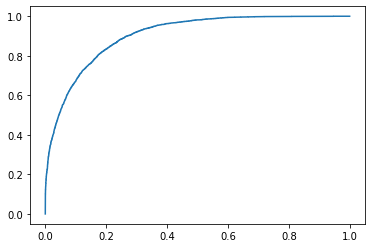

[2.         1.         1.         ... 0.00111044 0.00110825 0.00005738]
[0.00005738 0.0001168  0.00018092 ... 1.         1.         1.        ]
4.768841038632045


In [148]:
import pickle
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline

# load dataset
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)
    
#train prediction model    
c = 0.3
lr2 = LogisticRegression(solver = 'lbfgs', C= c, max_iter = 1000)
lr2.fit(adult50kp['x_train'], adult50kp['y_train'])
#make prediction
ypred = lr2.predict(adult50kp['x_test'])
ypredprob = lr2.predict_proba(adult50kp['x_test'])
#compute accuracy
ncorrect = np.sum(adult50kp['y_test'] == ypred)
accuracy_sk = ncorrect / adult50kp['y_test'].shape[0]
print("Accuracy = %f" % accuracy_sk) 
fpr, tpr, thresholds = roc_curve(adult50kp['y_test'], ypredprob[:, 1])
roc_auc = auc(fpr, tpr)
print("auc score = ", roc_auc)
plt.plot(fpr,tpr)
plt.show()
np.set_printoptions(suppress=True)
print(thresholds)
print(np.sort(ypredprob[:,1]))
print(len(ypred)/len(thresholds))